In [68]:
import scanpy as sc
import scvi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [69]:
adata=sc.read_10x_h5(r"C:\Users\ASUS\Downloads\20k_NSCLC_DTC_3p_nextgem_donor_1_count_sample_feature_bc_matrix.h5")

In [70]:
adata.var_names_make_unique()

In [71]:
adata


AnnData object with n_obs × n_vars = 1580 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'

In [72]:
adata.var

,gene_ids,feature_types,genome,pattern,read,sequence
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,,,
FAM138A,ENSG00000237613,Gene Expression,GRCh38,,,
OR4F5,ENSG00000186092,Gene Expression,GRCh38,,,
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,,,
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,,,
...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38,,,
AC023491.2,ENSG00000278633,Gene Expression,GRCh38,,,
AC007325.1,ENSG00000276017,Gene Expression,GRCh38,,,
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,,,


In [73]:
adata.var_names.nunique()

36601

In [74]:
adata.obs

""
AAACCCAGTCTTCGAA-1
AAACCCATCACATACG-1
AAACGAAAGCCTAACT-1
AAACGCTAGACAGTCG-1
AAACGCTCAGCAAGAC-1
...
TTTGGAGCATCGGTTA-1
TTTGGAGCATGACCCG-1
TTTGGAGGTGAGGCAT-1
TTTGTTGAGTGGAATT-1


In [75]:
adata.obs_names_make_unique()

In [76]:
adata.obs.index.nunique()

1580

In [77]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")

In [78]:
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [79]:
adata.var.head(10)

,gene_ids,feature_types,genome,pattern,read,sequence,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,,,,False,False,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38,,,,False,False,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38,,,,False,False,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,,,,False,False,False
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,,,,False,False,False
AL627309.2,ENSG00000239906,Gene Expression,GRCh38,,,,False,False,False
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,,,,False,False,False
AL627309.4,ENSG00000241599,Gene Expression,GRCh38,,,,False,False,False
AP006222.2,ENSG00000286448,Gene Expression,GRCh38,,,,False,False,False
AL732372.1,ENSG00000236601,Gene Expression,GRCh38,,,,False,False,False


In [80]:
adata.var['mt'].unique()

array([False,  True])

In [81]:
sc.pp.calculate_qc_metrics(adata,qc_vars=['mt','ribo'],log1p=True,inplace=True)

In [82]:
adata.var

,gene_ids,feature_types,genome,pattern,read,sequence,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,,,,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
FAM138A,ENSG00000237613,Gene Expression,GRCh38,,,,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,GRCh38,,,,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,,,,False,False,False,6,0.003797,0.003790,99.620253,6.0,1.945910
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,,,,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38,,,,False,False,False,1,0.002532,0.002528,99.936709,4.0,1.609438
AC023491.2,ENSG00000278633,Gene Expression,GRCh38,,,,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC007325.1,ENSG00000276017,Gene Expression,GRCh38,,,,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,,,,False,False,False,64,0.043671,0.042744,95.949367,69.0,4.248495


In [83]:
adata.obs.head(2)

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo
AAACCCAGTCTTCGAA-1,5266,8.569216,29888.0,10.305245,39.470691,50.960252,59.987286,69.710252,779.0,6.659294,2.606397,8675.0,9.068316,29.025026
AAACCCATCACATACG-1,5607,8.631949,20348.0,9.920787,23.358561,31.064478,40.097307,53.135443,98.0,4.595120,0.481620,3155.0,8.057060,15.505210


... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'pattern' as categorical
... storing 'read' as categorical
... storing 'sequence' as categorical


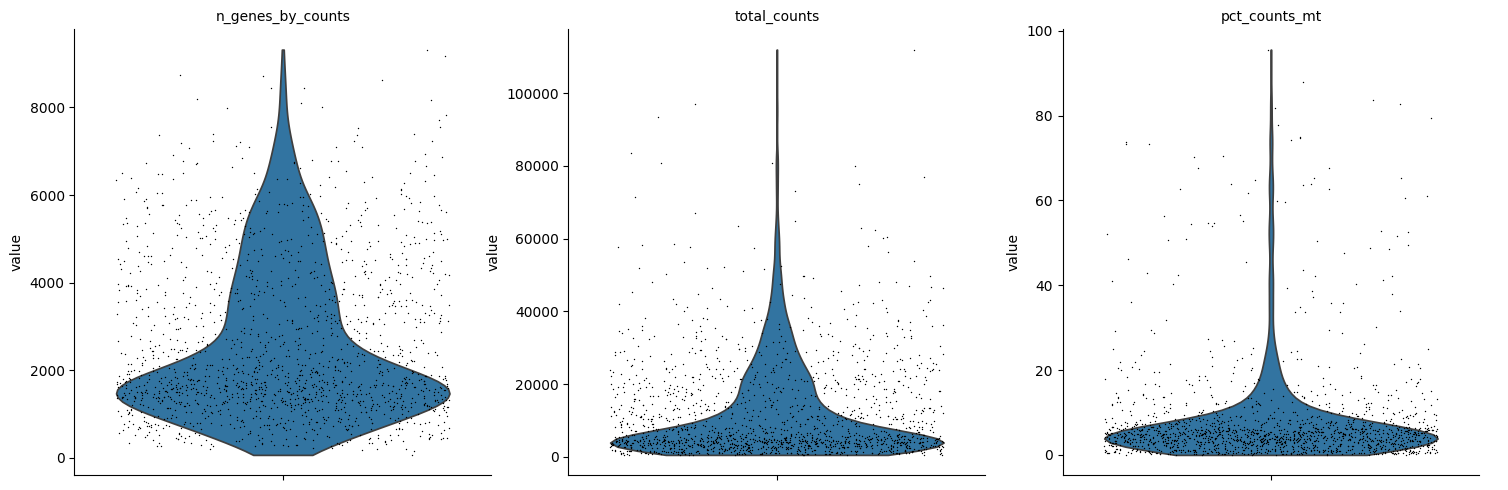

In [84]:
sc.pl.violin(adata, ['n_genes_by_counts','total_counts','pct_counts_mt'],jitter=0.4,multi_panel=True)

<Axes: >

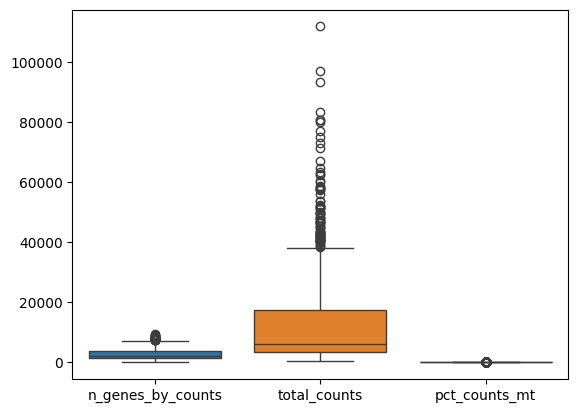

In [85]:
sns.boxplot(adata.obs[['n_genes_by_counts','total_counts','pct_counts_mt']])

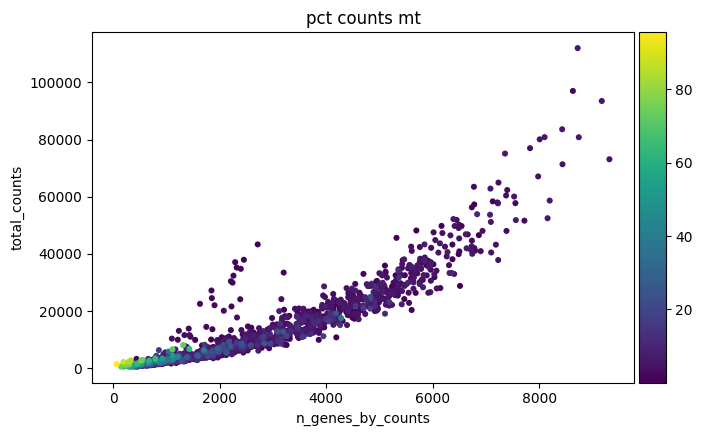

In [86]:
sc.pl.scatter(adata, x='n_genes_by_counts',y='total_counts',color="pct_counts_mt")

In [87]:
upper=np.quantile(adata.obs['total_counts'],0.98)
upper

np.float32(51347.08)

In [88]:
adata

AnnData object with n_obs × n_vars = 1580 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [89]:
adata.obs.sort_values('n_genes_by_counts',ascending=False)

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo
CATACAGGTAACAGGC-1,9320,9.140025,73099.0,11.199584,19.509159,28.728163,38.851421,52.339977,3297.0,8.101071,4.510322,12289.0,9.416541,16.811447
TGCATCCGTTCTTCAT-1,9177,9.124565,93501.0,11.445738,27.328050,35.499086,45.060481,58.182265,5117.0,8.540519,5.472669,10714.0,9.279400,11.458701
CAAGCTAGTAGTCACT-1,8745,9.076352,80802.0,11.299769,31.446004,43.672186,53.284572,64.273162,4623.0,8.439015,5.721393,20602.0,9.933192,25.496895
AGTAGTCTCGTGCACG-1,8724,9.073948,111999.0,11.626254,34.075304,47.094170,57.345155,67.812213,7420.0,8.912069,6.625059,30719.0,10.332669,27.427923
AGCCAATTCATGAGTC-1,8634,9.063579,97011.0,11.482590,31.761347,44.377442,55.490614,67.421220,1516.0,7.324490,1.562709,29458.0,10.290754,30.365627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAATAGAGTCACCGAC-1,196,5.283204,557.0,6.324359,73.788151,82.764811,100.000000,100.000000,333.0,5.811141,59.784561,27.0,3.332205,4.847397
TTCGCTGAGTGCAGGT-1,195,5.278115,2157.0,7.676937,93.277701,95.595735,100.000000,100.000000,1897.0,7.548556,87.946228,43.0,3.784190,1.993510
GGAACCCCACGCTGTG-1,169,5.135798,609.0,6.413459,80.459770,88.669951,100.000000,100.000000,429.0,6.063785,70.443352,27.0,3.332205,4.433497
TCTACCGAGCAAGCCA-1,149,5.010635,566.0,6.340359,82.508834,91.342756,100.000000,100.000000,418.0,6.037871,73.851593,10.0,2.397895,1.766784


In [90]:

sc.pp.filter_cells(adata,min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [91]:
adata=adata[adata.obs['pct_counts_mt']<5 ]
adata=adata[adata.obs['n_genes_by_counts'] <2000]
adata=adata[adata.obs['total_counts'] < upper]


In [92]:
sc.pp.scrublet(adata,threshold=0.25)

In [93]:
adata.obs['predicted_doublet'].value_counts()

predicted_doublet
False    374
True       2
Name: count, dtype: int64

ở bước này có thể lọc double bằng SOLO nhưng máy là CPU và Google Colab hết hạn dùng GPU nên để khi khác

In [94]:
adata.layers['counts']=adata.X.copy()

In [95]:
sc.pp.normalize_total(adata,target_sum=10000)
sc.pp.log1p(adata)

In [96]:
adata.raw=adata

In [97]:
sc.pp.highly_variable_genes(adata,n_top_genes=2000,flavor='seurat_v3')

In [98]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

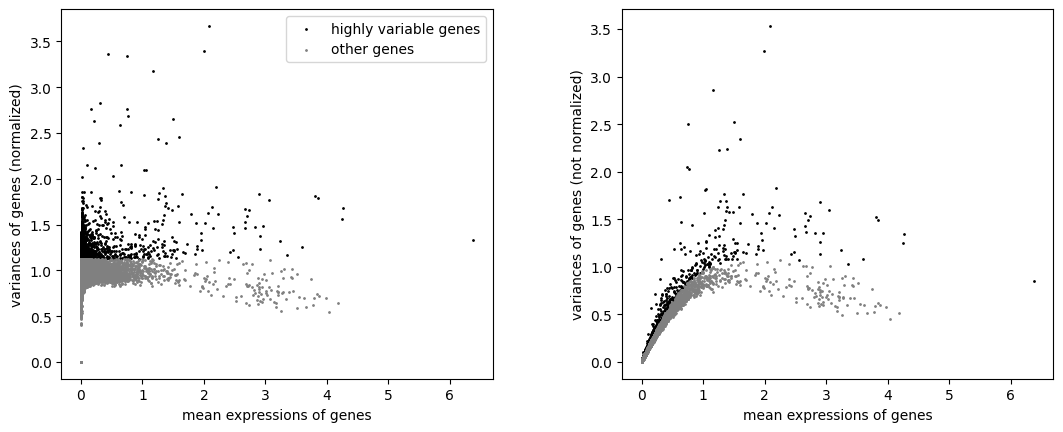

In [99]:
sc.pl.highly_variable_genes(adata)

In [100]:
adata = adata[:, adata.var.highly_variable]

In [101]:
sc.pp.scale(adata,max_value=10)

In [102]:
sc.tl.pca(adata,svd_solver='arpack')

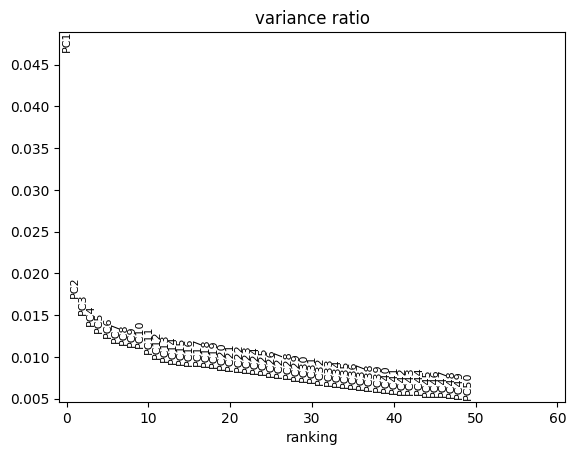

In [103]:
sc.pl.pca_variance_ratio(adata,n_pcs=60)

In [104]:
sc.pp.neighbors(adata,n_pcs=40)

In [105]:
sc.tl.umap(adata)

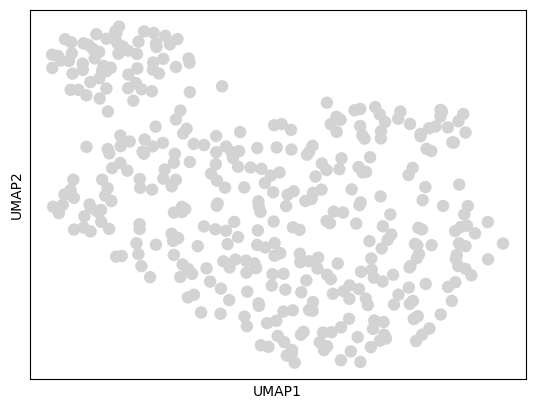

In [106]:
sc.pl.umap(adata)

In [107]:
for res in [0.1,0.3,0.5,0.7]:
    sc.tl.leiden(adata, resolution=res,key_added=(f"res_{res}"))

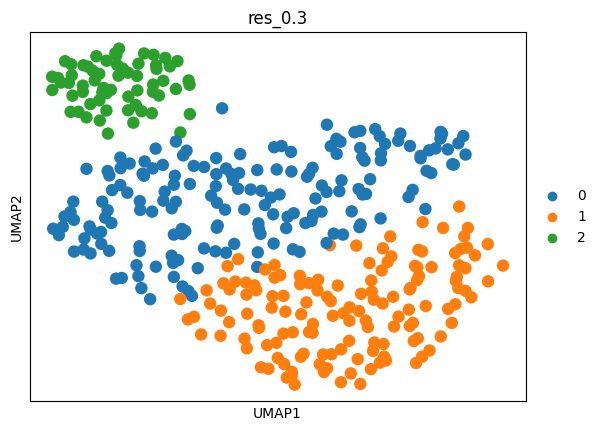

In [108]:
sc.pl.umap(adata,color='res_0.3')

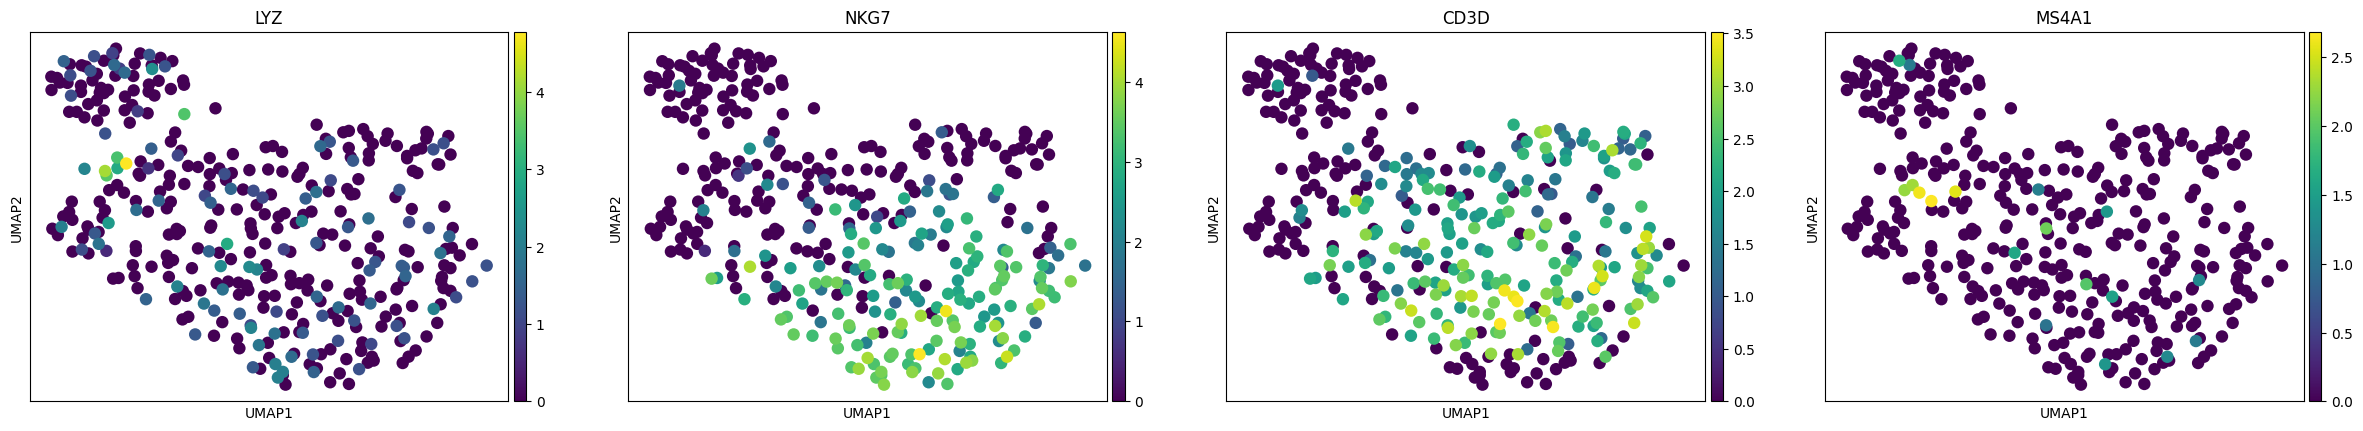

In [109]:
sc.pl.umap(adata,color=["LYZ", "NKG7", "CD3D","MS4A1"])

In [110]:
adata.obs['Cluster']=adata.obs['res_0.3']

In [111]:
adata.obs.head(2)

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,...,log1p_total_counts_ribo,pct_counts_ribo,n_genes,doublet_score,predicted_doublet,res_0.1,res_0.3,res_0.5,res_0.7,Cluster
AAACGCTAGACAGTCG-1,1045,6.952729,3410.0,8.134761,45.395894,59.061584,71.260997,84.017595,117.0,4.770685,...,6.709304,24.017595,1045,0.042017,False,0,0,1,1,0
AACAAGAAGCCGGATA-1,1304,7.173958,4095.0,8.317766,39.804640,54.725275,67.277167,80.366300,131.0,4.882802,...,6.993933,26.593409,1304,0.063014,False,0,0,1,1,0


In [112]:
cell_type={i:"" for i in range(0,5)}
cell_type

{0: '', 1: '', 2: '', 3: '', 4: ''}

In [113]:
sc.tl.rank_genes_groups(adata,n_genes=10,groupby='Cluster')

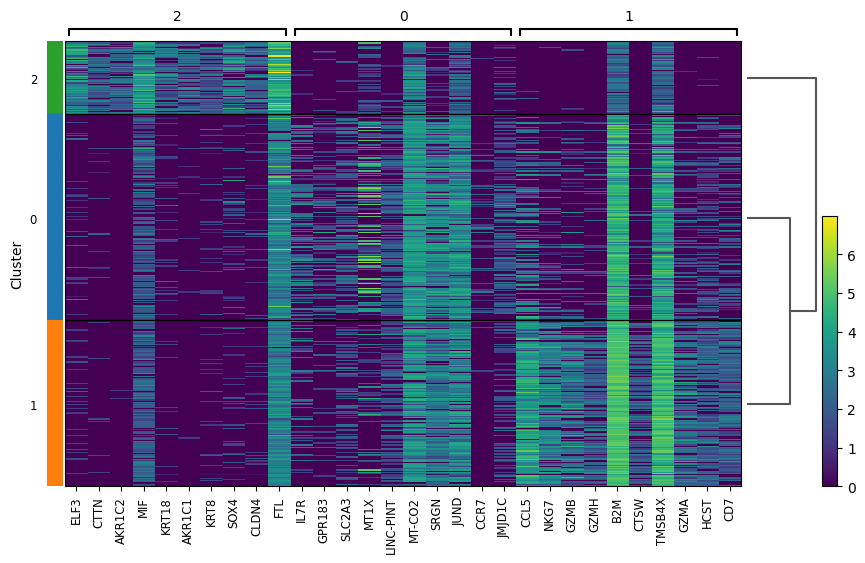

In [114]:
sc.pl.rank_genes_groups_heatmap(adata,n_genes=10,groupby='Cluster')

In [115]:
import celltypist

In [116]:
path =celltypist.models.get_model_path(r'C:\\Users\\ASUS\\.celltypist\\data\\models')

In [117]:
model = celltypist.models.Model.load(path + "/Immune_All_Low.pkl")

In [118]:
predictions = celltypist.annotate(adata, model=model)
adata.obs['cell_type'] = predictions.predicted_labels


👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 376 cells and 21478 genes
🔗 Matching reference genes in the model
🧬 5719 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


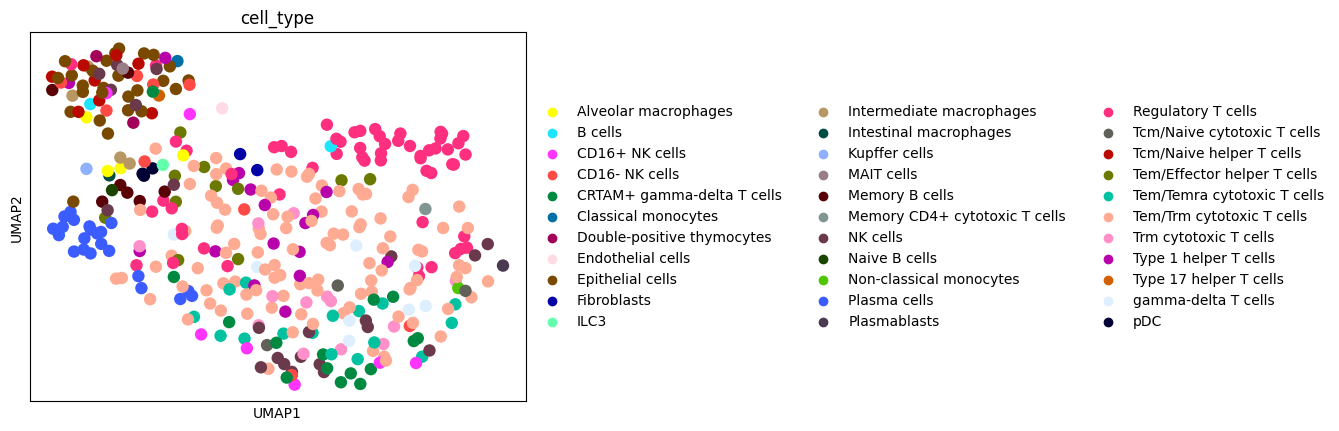

In [119]:
sc.pl.umap(adata, color='cell_type')


In [120]:
scvi.model.SCVI.setup_anndata(adata, layer='counts')

In [121]:
Model=scvi.model.SCVI(adata)

In [122]:
Model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


- Latent embedding: dùng để xây neighbors, UMAP, clustering.
- Không dùng PCA từ dữ liệu log-normalized: dùng latent scVI cho mọi bước downstream.


In [123]:
adata.obsm["X_scVI"]=Model.get_latent_representation()

In [124]:
sc.pp.neighbors(adata, use_rep="X_scVI",n_neighbors=10)

In [125]:
sc.tl.umap(adata)

In [145]:
sc.tl.leiden(adata,resolution=0.2)

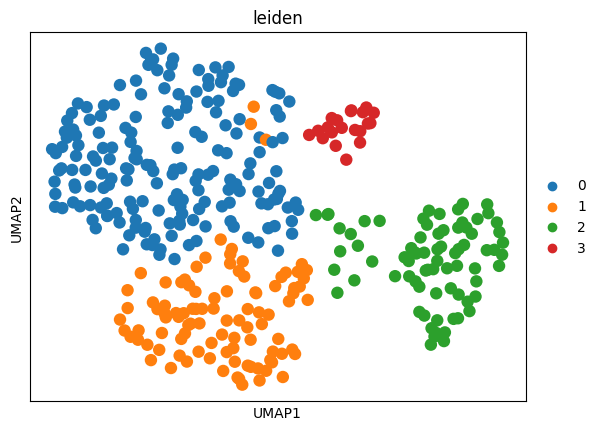

In [146]:
sc.pl.umap(adata,color="leiden")

In [147]:
de= Model.differential_expression(adata,groupby="leiden", group1="1",group2="0",idx1=None, idx2=None,delta=0.5)

DE...:   0%|          | 0/1 [00:00<?, ?it/s]

In [148]:
de[de['proba_m2']>0.9]

,proba_m1,proba_m2,bayes_factor,scale1,scale2,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,comparison,group1,group2
MCL1,0.0970,0.9030,-2.231011,0.001278,0.002888,1.051020,3.714288,0.581633,0.868132,13.097363,26.414909,1 vs 0,1,0
HSPD1,0.0962,0.9038,-2.240179,0.002270,0.007406,1.948979,10.346154,0.602041,0.967033,21.104137,71.428947,1 vs 0,1,0
LINC-PINT,0.0954,0.9046,-2.249414,0.000667,0.002048,0.479592,2.664837,0.346939,0.873626,5.451320,19.272650,1 vs 0,1,0
CXCR4,0.0948,0.9052,-2.256386,0.002036,0.005201,1.561224,7.038462,0.653061,0.912088,20.082354,51.589077,1 vs 0,1,0
DUSP4,0.0944,0.9056,-2.261057,0.000541,0.002303,0.448980,2.901102,0.244898,0.725275,5.046450,22.015429,1 vs 0,1,0
CREM,0.0942,0.9058,-2.263398,0.001011,0.003880,0.540816,5.747256,0.306122,0.862637,6.549517,40.770157,1 vs 0,1,0
BTG1,0.0910,0.9090,-2.301485,0.004967,0.012527,3.908162,17.472530,0.948980,1.000000,51.393234,126.007507,1 vs 0,1,0
MT1M,0.0842,0.9158,-2.386603,0.000024,0.000548,0.000000,0.087912,0.000000,0.010989,0.000000,0.615048,1 vs 0,1,0
SRGN,0.0840,0.9160,-2.389199,0.003545,0.008348,2.989795,11.884614,0.836735,0.983516,37.351738,84.571106,1 vs 0,1,0
MT-CO2,0.0804,0.9196,-2.436925,0.007283,0.015221,6.081635,21.346153,0.887755,1.000000,76.667084,156.324738,1 vs 0,1,0


In [149]:
de.index[de['proba_m1']>0.9]

Index(['ZNF17', 'AL627171.2', 'TRGV5', 'PLCG2', 'PROSER3', 'RMRP', 'PLAAT2',
       'NR2F1', 'AC010618.3', 'ZBED3', 'RESF1', 'GIMAP4', 'AL049779.4',
       'ZNF532', 'AL133245.1', 'P3H2', 'SLFN5', 'WDR61', 'SRGAP3', 'EDN1',
       'IL31RA', 'MXRA5', 'LRRTM2', 'NIPAL2', 'SLC35G1', 'LBHD1', 'AP002478.1',
       'C1QC', 'AC027097.2', 'EHF', 'FAM47E', 'AC139768.1', 'CD1C', 'AQP7',
       'HIST3H2BB', 'ERCC8', 'AC067930.8'],
      dtype='object')

In [130]:
sc.tl.rank_genes_groups(adata, n_genes=10, groupby='leiden')

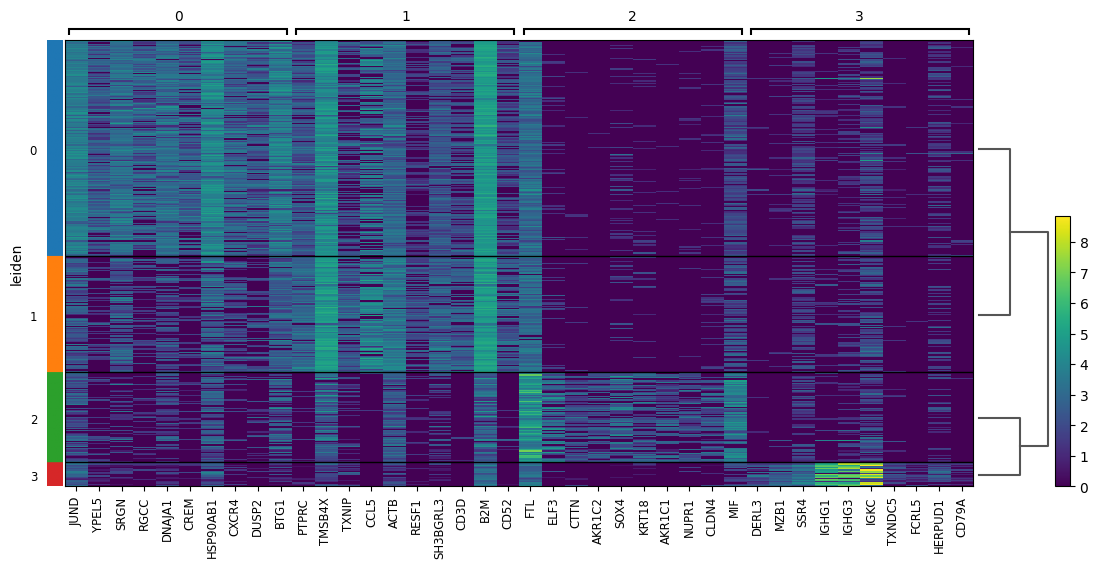

In [150]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, groupby='leiden')

Nhóm 0 và nhóm 1 có các marker biểu hiện mạnh trùng nhau???Có thể là chung nhóm cell

- Độ mạnh bằng chứng (Bayesian evidence) cho sự khác biệt.
- Giá trị càng cao → bằng chứng càng mạnh gene là DE.>3 là mạnh
- scale1, scale2
- Thang đo (scale factors) cho mean expression ở group1 và group2.
- raw_mean1, raw_mean2
- Mean expression thô (raw counts) ở group1 và group2


In [132]:
predictions = celltypist.annotate(adata, model=model)
adata.obs['cell_type'] = predictions.predicted_labels

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 376 cells and 21478 genes
🔗 Matching reference genes in the model
🧬 5719 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


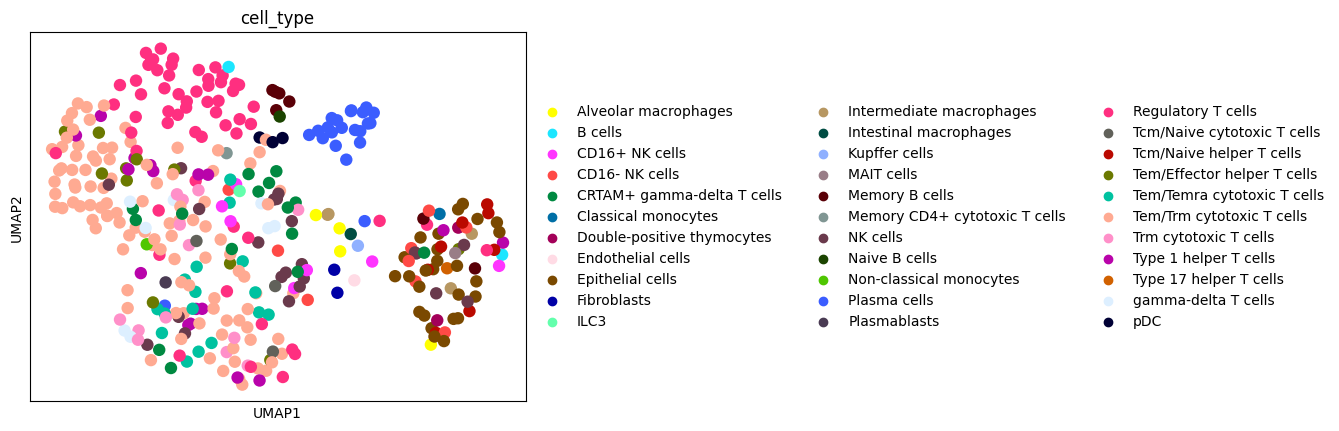

In [151]:
sc.pl.umap(adata, color='cell_type')

0:Regulatory T cell, 1: Tem/Trm cyotoxic T cell, 2:Epithelial cell, 3:Plasma cell